In [28]:
from PIL import Image
from itertools import product
import random
import numpy

white = (255, 255, 255)
gray = (128, 128, 128)
black = (0, 0, 0)

color_to_colorname = {
    white: "white",
    gray: "gray",
    black: "black"
}

all_colors = [white, gray, black]
morph_feature_size = 8
img_dim_sizes = [256, 512, 768]

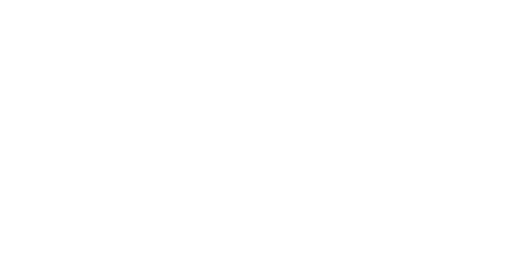

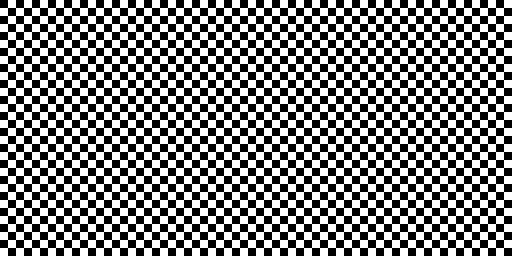

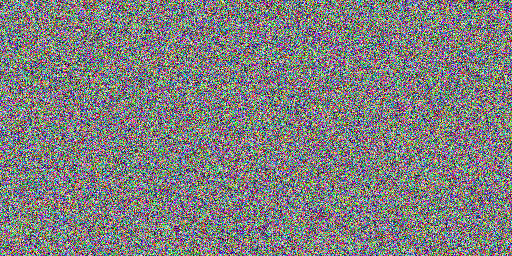

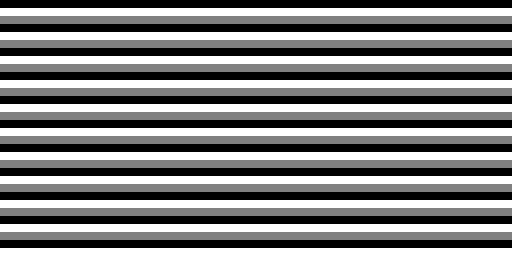

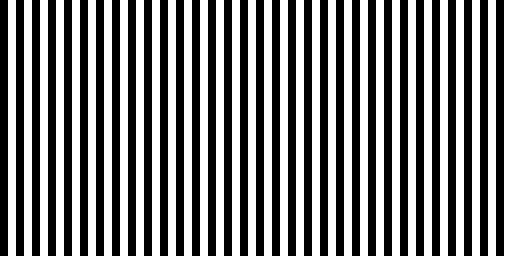

In [27]:
def single_color(height: int, width: int, colors: list, feature_size: int = 0):
    image = Image.new("RGB", (width, height), colors[0])
    return image


def checkerboard(height, width, colors: list, feature_size: int):
    image = Image.new("RGB", (width, height))
    for y, x in product(
        range(0, height, feature_size), range(0, width, feature_size)
    ):
        color = colors[(x // feature_size + y // feature_size) % len(colors)]
        for i in range(feature_size):
            for j in range(feature_size):
                if x + i < width and y + j < height:
                    image.putpixel((x + i, y + j), color)
    return image


def random_noise(height, width, colors = [], feature_size = 0):
    imarray = numpy.random.rand(height, width, 3) * 255
    image = Image.fromarray(imarray.astype("uint8")).convert("RGB")
    return image


def stripes_horizontal(height, width, colors: list, feature_size):
    image = Image.new("RGB", (width, height))
    for y, x in product(
        range(0, height, feature_size), range(0, width, feature_size)
    ):
        color = colors[(y // feature_size) % len(colors)]
        for i in range(feature_size):
            for j in range(feature_size):
                if x + i < width and y + j < height:
                    image.putpixel((x + i, y + j), color)
    return image


def stripes_vertical(height, width, colors: list, feature_size):
    image = Image.new("RGB", (width, height))
    for y, x in product(
        range(0, height, feature_size), range(0, width, feature_size)
    ):
        color = colors[(x // feature_size) % len(colors)]
        for i in range(feature_size):
            for j in range(feature_size):
                if x + i < width and y + j < height:
                    image.putpixel((x + i, y + j), color)
    return image


single_color(img_dim_sizes[0], img_dim_sizes[1], [white]).show()
checkerboard(
    img_dim_sizes[0], img_dim_sizes[1], [black, white], morph_feature_size
).show()
random_noise(img_dim_sizes[0], img_dim_sizes[1]).show()
stripes_horizontal(
    img_dim_sizes[0], img_dim_sizes[1], [black, white, gray], morph_feature_size
).show()
stripes_vertical(
    img_dim_sizes[0], img_dim_sizes[1], [black, white], morph_feature_size
).show()

In [30]:
def generate_imgs():
    generators = {
        "single_color": single_color,
        "checkerboard": checkerboard,
        "random_noise": random_noise,
        "stripes_horizontal": stripes_horizontal,
        "stripes_vertical": stripes_vertical,
    }
    for w, h in product(img_dim_sizes, img_dim_sizes):
        for c1, c2 in product(all_colors, all_colors):
            if c1 == c2:
                continue
            for generator_type in generators.keys():
                image = generators[generator_type](
                    w, h, [c1, c2], morph_feature_size
                )
                # save the image to disk
                image.save(
                    f"../datasets/synthetic/{generator_type}_{w}_{h}_{color_to_colorname[c1]}_{color_to_colorname[c2]}.png"
                )

generate_imgs()